# Cours

OC DS P4 - 4470521 [Modélisez vos données avec les méthodes ensemblistes](https://openclassrooms.com/fr/courses/4470521-modelisez-vos-donnees-avec-les-methodes-ensemblistes)

# 1.1 Améliorez la performance de vos algorithmes à l’aide des méthodes ensemblistes parallèles

ensembliste : combinaison de méthodes (apprenants faibles) pour produire une prédiction plus robuste et performante.

2 familles :
1/ parallèles, 2/ séquentielles

Exemple - boostrap : méthode pionnière

Introduction de principe

# 1.2 Contrôlez la variance à l’aide du bagging

Fondateur des méthodes //.

Va permettre de comprendre les forêts aléatoires.

bagging : diminutif de *boostrap aggregation*.

Il n'explicite pas 'tirage avec remplacement'.

Synthèse des prédictions :
* Moyenne pour une régression
* Vote à la majorité pour une classification

Apprenant faible = modèles à forte variance.

Le bagging permet d'obtenir une variance finale plus faible que celle des variances des apprenants faibles.

Application :

Jeu de données d'exemple

In [1]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, noise=0.25)

Séparation :

In [2]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)

Création et entraînement du modèle de bagging (5 estimateurs, par défaut des arbres de décision) :

In [3]:
from sklearn.ensemble import BaggingClassifier 
bagging = BaggingClassifier(n_estimators=5)
bagging.fit(X_train, y_train)

BaggingClassifier(n_estimators=5)

Installation d'utilitaires d'affichage (mglearn)

In [ ]:
%pip install mglearn

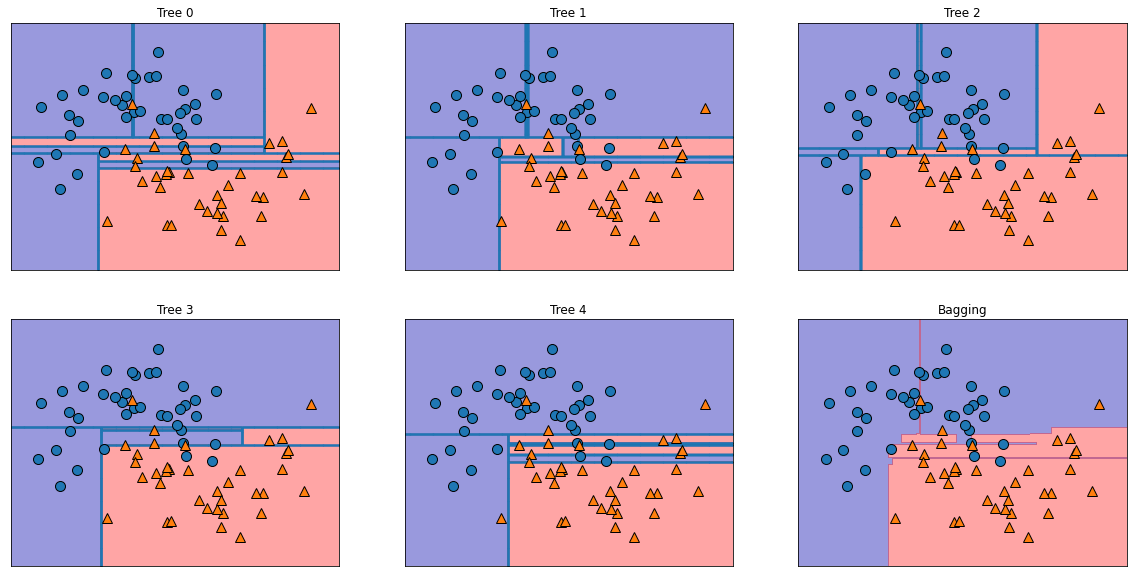

In [5]:
from mglearn.plot_interactive_tree import plot_tree_partition
from mglearn.plot_2d_separator import plot_2d_separator
from mglearn.tools import discrete_scatter
import matplotlib.pyplot as plt
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), bagging.estimators_)):
    ax.set_title("Tree {}".format(i))
    plot_tree_partition(X_train, y_train, tree, ax=ax)
plot_2d_separator(bagging, X_train, fill=True, ax=axes[-1, -1],
                                    alpha=.4)
axes[-1, -1].set_title("Bagging")
discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)

# 1.3 Réduisez la corrélation entre les apprenants faibles à l’aide des forêts aléatoires

Forêt aléatoire (*random forest*) = $n$ arbres de décision binaire (Binary trees) combinés par bagging.

Arbres de décision :
* modèles non paramétriques.
* tendance à l'overfitting / variance élevée : individuellement médiocre.

Composé par le bagging.

Avantages :
* Complexité peu élevée (en comparaison d'autres lagos de performance équivalente)
* Estimation de l'importance des features
* Pas d'overfitting
* Mémoire : ne dépasse pas celle du stockage des données

Algos de génération des arbres de décision :
* CART : Classification And Regression Tree
* greedy, top-down recursive partioning algorithm.

Il n'est pas très clair sur les sélection des features et règles de chaque noeud.

Heuristiques de 'pureté' utilisées :
* index de pureté de Gini
* entropie
* gain d'information

Puis élagage de l'arbre... pour réduire l'overfitting.

Création de l'arbre de décision : ... $m$, aléatoire ... pas CART.

La performance de la forêt dépend de :
* la corrélation entre les couples d'arbres (on cherche à la minimiser puisque sinon plus de variance donc plus d'erreur)
* la performance de chaque arbre

# 1.4 TP Mesurez la puissance des forêts aléatoires

Source de données : https://www.kaggle.com/datasets/uciml/human-activity-recognition-with-smartphones?select=test.csv

In [5]:
import pandas as pd
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
test

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978,2,STANDING
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898,2,STANDING
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,-0.640736,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346,2,STANDING
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,-0.736124,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108,2,STANDING
4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.846595,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857,2,STANDING
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2942,0.310155,-0.053391,-0.099109,-0.287866,-0.140589,-0.215088,-0.356083,-0.148775,-0.232057,0.185361,...,-0.750809,-0.337422,0.346295,0.884904,-0.698885,-0.651732,0.274627,0.184784,24,WALKING_UPSTAIRS
2943,0.363385,-0.039214,-0.105915,-0.305388,0.028148,-0.196373,-0.373540,-0.030036,-0.270237,0.185361,...,-0.700274,-0.736701,-0.372889,-0.657421,0.322549,-0.655181,0.273578,0.182412,24,WALKING_UPSTAIRS
2944,0.349966,0.030077,-0.115788,-0.329638,-0.042143,-0.250181,-0.388017,-0.133257,-0.347029,0.007471,...,-0.467179,-0.181560,0.088574,0.696663,0.363139,-0.655357,0.274479,0.181184,24,WALKING_UPSTAIRS
2945,0.237594,0.018467,-0.096499,-0.323114,-0.229775,-0.207574,-0.392380,-0.279610,-0.289477,0.007471,...,-0.617737,0.444558,-0.819188,0.929294,-0.008398,-0.659719,0.264782,0.187563,24,WALKING_UPSTAIRS


In [6]:
X_train = train[train.columns[:-2]]
y_train = train['Activity']

X_test = test[test.columns[:-2]]
y_test = test['Activity']

In [7]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=500, oob_score=True)
model = rfc.fit(X_train, y_train)
from sklearn.metrics import accuracy_score
pred = rfc.predict(X_test)
print("accuracy {:.2f}".format(accuracy_score(y_test, pred)))

accuracy 0.93


Sélection de caractéristiques

In [8]:
from sklearn.feature_selection import SelectFromModel
select = SelectFromModel(rfc, prefit=True, threshold=0.003)
X_train2 = select.transform(X_train)
print(X_train2.shape)

(7352, 84)


c:\Users\franc\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


In [9]:
import timeit

rfc2 = RandomForestClassifier(n_estimators=500, oob_score=True)

start_time = timeit.default_timer()

rfc2 = rfc2.fit(X_train2, y_train)

X_test2 = select.transform(X_test)

pred = rfc2.predict(X_test2)
elapsed = timeit.default_timer() - start_time
accuracy = accuracy_score(y_test, pred)

print("accuracy {:.2f} time {:.2f}s".format(accuracy, elapsed))


c:\Users\franc\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


accuracy 0.89 time 19.37s


# 2.1 Initiez-vous aux méthodes séquentielles et au Boosting

Amélioration successives, sur base d'une chaîne d'apprenants faibles.

AdaaBoost (boosting) : modèle historique

Pondération plus fortes sur les observations sur lesquelles les modèles précédents ont fait des erreurs.

La classifieur final est la somme pondérée de tous les lassieurs.

Il explicte l'algo tout propre en $\LaTeX$

Apprenants faibles : de petits arbres de décision (souches - *stumps*).

=> User Guide SKL, ce sera plus clair.

Next - méthode la + utilisée de nos jours : gradient boosting (X)GBoost.

# 2.2 (X)GBoost

Généralisation de l'AdaBoost avec diverses fonctions de pertes sur lesquelles on effectue une descente de gradient.

L'AdaBoost devient l'algo de descente de gradient (si j'ai bien compris ses explications)

**descente de gradient fonctionnelle**

Consituants :
* fonction de perte à optimiser, de classe C1
* apprenants faibles
* modèle additif pour combiner les apprenants faibles et minimiser la fonction de perte en suivant le gradient => ajout d'un arbre de décision supplémentaire

Risque de surajustement => besoin de régularisation.

Paramètres (permettant de contrôler le surajustement):
* nombre d'arbres
* profondeur des arbres
* nombre d'observations utilisées (par séparation d'un arbre ???)
* minimum d'amélioration apporté (???)

En classification :
Perte exponentielle : celle de l'AdaBoost originel
Si environnement bruté : déviance binomiale : log(1 + exp(-2yf))

En régression : perte des moindres carrés (norme l2), ou norme l1

En pratique, on utilise les deux classes SKL GradientBoostingClassifier et GradientBoostingRegressor.

Deux hyper paramètres : learning_rate et n_estimators.

En complément de SKL, invitation à utiliser un package très prisé dans les compétitions Kaggle : xgboost : https://github.com/dmlc/xgboost

Forêts aléatoires : bien pour démarrer, fonctionne aussi en grandes dimensions.

gradient boosting : des hyperparamètres + besoin de feature engineering.